<a href="https://colab.research.google.com/github/jsykes50/auto-insurance/blob/main/swedish_auto_insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-insurance-in-sweden-small-dataset/insurance.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../input/auto-insurance-in-sweden-small-dataset/insurance.csv', skiprows=4)

In [ ]:
df.head()

,Y = total payment for all the claims in thousands of Swedish Kronor
108,392.5
19,46.2
13,15.7
124,422.2
40,119.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 108 to 26
Data columns (total 1 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Y = total payment for all the claims in thousands of Swedish Kronor  63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


In [ ]:
df.describe()

,Y = total payment for all the claims in thousands of Swedish Kronor
count,63.000000
mean,98.187302
std,87.327553
min,0.000000
25%,38.850000
50%,73.400000
75%,140.000000
max,422.200000


In [ ]:
df.shape

(63, 1)

In [ ]:
# Changing Column names

In [ ]:
df.rename(columns={'Y = total payment for all the claims in thousands of Swedish Kronor': 'Payments'}, inplace=True)

In [ ]:
df['Claims'] = df.index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Payments,Claims
0,392.5,108
1,46.2,19
2,15.7,13
3,422.2,124
4,119.4,40


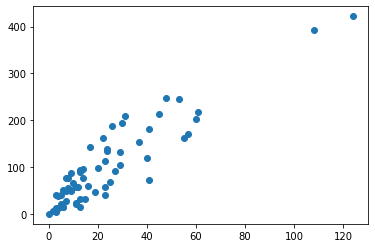

In [ ]:
plt.scatter(x=df['Claims'], y=df['Payments'])
plt.show()

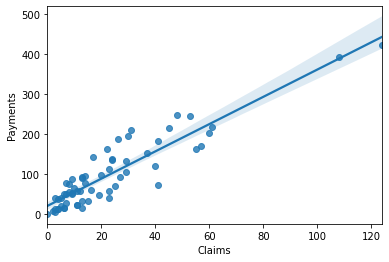

In [ ]:
sns.regplot(x="Claims", y="Payments", data=df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = df['Claims'].values
y = df['Payments'].values

In [ ]:
x = x.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.33, random_state=42)

In [ ]:
model = LinearRegression().fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

0.8870726295495153

In [ ]:
y_pred = model.predict(x_test)

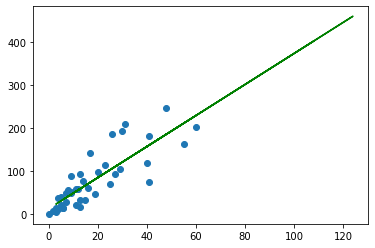

In [ ]:
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_pred, color="green")